In [22]:
ROOT = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization'
ROOT_PACKAGE = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/collaborative-optimizer'

import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(ROOT_PACKAGE)
from experiment_graph.data_storage import DedupedStorageManager
from experiment_graph.executor import CollaborativeExecutor
from experiment_graph.execution_environment import ExecutionEnvironment
from experiment_graph.optimizations.Reuse import FastBottomUpReuse
from experiment_graph.graph.graph_representations import ExperimentGraph
from paper.experiment_workloads.kaggle_home_credit.optimized.introduction_to_manual_feature_engineering import introduction_to_manual_feature_engineering

ee = ExecutionEnvironment('dedup', reuse_type=FastBottomUpReuse.NAME)
workload = introduction_to_manual_feature_engineering()

In [23]:
ee = ExecutionEnvironment(DedupedStorageManager(), reuse_type=FastBottomUpReuse.NAME)
workload = introduction_to_manual_feature_engineering()

root_data = ROOT + '/data'
database_path = root_data + '/experiment_graphs/kaggle_home_credit/all_mat/'
if os.path.exists(database_path):
    ee.load_history_from_disk(database_path)
executor = CollaborativeExecutor(ee)

In [29]:
graph = ee.experiment_graph.graph


In [44]:
d = ee.experiment_graph.retrieve_data('bureau_balance.csv{}')

In [47]:
d.pandas_df

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [38]:
for node in graph.nodes(data=True):
    if node[1]['root']:
        print node

('bureau_balance.csv{}', {'loc': '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/data/kaggle_home_credit/bureau_balance.csv', 'mat': True, 'recreation_cost': 0, 'meta_freq': 1, 'data': <experiment_graph.graph.node.Dataset object at 0x11df31b10>, 'potential': 0.00015606988879801305, 'extra_params': {}, 'root': True, 'type': 'Dataset', 'size': 1652925.216796875})
('bureau.csv{}', {'loc': '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/data/kaggle_home_credit/bureau.csv', 'mat': True, 'recreation_cost': 0, 'meta_freq': 1, 'data': <experiment_graph.graph.node.Dataset object at 0x11ecf8e10>, 'potential': 0.00033844614843854754, 'extra_params': {}, 'root': True, 'type': 'Dataset', 'size': 464058.189453125})
('application_test.csv{}', {'loc': '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/data/kaggle_home_credit/application_test.csv', 'mat': True, 'recreation_cost': 0, 'meta_freq': 1, 'data': <experiment_graph.graph.node.Dataset object at

In [41]:
node = graph.nodes['B1F1E73288B3A1033F10AF0C043D2968']

In [43]:
node['data'].underlying_data.get_data()

None


the root node is in already the history graph
the root node is in already the history graph
The correlation between EXT_SOURCE_3 and the TARGET is -0.1791
Median value for loan that was not repaid = 0.3791
Median value for loan that was repaid =     0.5460
The correlation between previous_loan_counts and the TARGET is -0.0091
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     4.0000
The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0882
Median value for loan that was not repaid = -842.4868
Median value for loan that was repaid =     -1067.0000


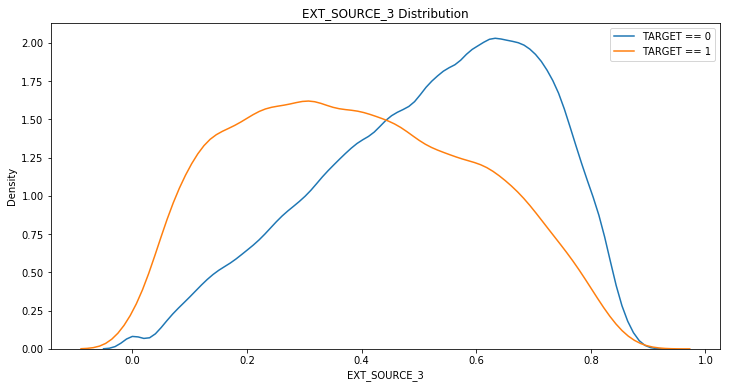

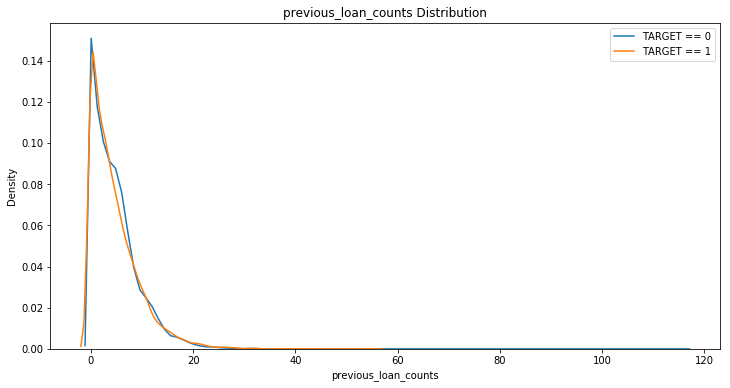

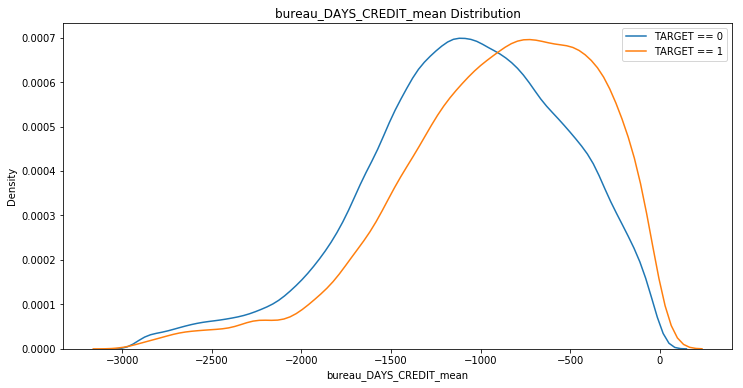

In [3]:
executor.end_to_end_run(workload=workload, root_data=root_data, verbose=1)

In [8]:
graph = executor.execution_environment.experiment_graph.graph

In [17]:
for s,d,data in graph.edges(data=True):
    if data['name'] == 'merge':
        print s,d, data

E05C929FD4B0410E05B814CEFE556023 D75BA4BC282364D67C95C9E7F34638E1 {'oper': 'p_merge', 'hash': "merge({'on':'SK_ID_CURR','how':'left'})", 'name': 'merge', 'execution_time': 749.702, 'args': {'on': 'SK_ID_CURR', 'how': 'left'}, 'freq': 1}
AF8141BA4671A3AB0608A0D72327063B 17EBE9E7CCEE7EF6FC877392264E5995 {'oper': 'p_merge', 'hash': "merge({'on':'SK_ID_CURR','how':'left'})", 'name': 'merge', 'execution_time': 959.318, 'args': {'on': 'SK_ID_CURR', 'how': 'left'}, 'freq': 1}


In [21]:
graph.nodes['D75BA4BC282364D67C95C9E7F34638E1']['data'].underlying_data.get_column()

['Unnamed: 0',
 'SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGI